## Import

In [1]:
import sys

sys.path.append('C:\\Users\\Marco\\Documents\\GitHub\\GeoSpatial-analysis\\modules')

In [146]:
import json
import pytz
import folium
import geojson
import numpy as np
import pandas as pd
import pymongo as pm
import seaborn as sns
import shapely as shp
import geopandas as gpd
from dateutil import parser
from datetime import datetime
from matplotlib import pyplot as plt
from pymongo_get_database import get_database
from matplotlib.animation import FuncAnimation
from convert_geometry import toMultiLineString, toExtremePoints

## Retrieve DB and collections

In [3]:
day = "20_04_2023"

In [312]:
# retrieve database and collections
db_name = "bergenTrafficFlowData"
db = get_database(db_name)

collection_name = "clean_data_" + day
collection_clean = db[collection_name]

## Morning Data

In [5]:
first_morning_date = datetime.strptime(f"2023-04-{day[:2]}T07:30:00.000+02:00", "%Y-%m-%dT%H:%M:%S.%f%z")
last_morning_date = datetime.strptime(f"2023-04-{day[:2]}T09:30:00.000+02:00", "%Y-%m-%dT%H:%M:%S.%f%z")

In [6]:
df = pd.json_normalize(collection_clean.find({"api_call_time": {"$gte": first_morning_date, "$lte": last_morning_date}}))
df.set_index("_id", inplace=True)

In [7]:
df['geometry.multi_line'] = df.apply(lambda x: toMultiLineString(x["geometry.geometries"]), axis=1)
df['geometry.extreme_point'] = df.apply(lambda x: toExtremePoints(x["geometry.multi_line"]), axis=1)
df['api_call_time'] = df.apply(lambda x: x["api_call_time"].tz_localize('UTC'), axis=1)
df['sourceUpdated'] = df.apply(lambda x: x["sourceUpdated"].tz_localize('UTC'), axis=1)

In [8]:
gdf = gpd.GeoDataFrame(df, geometry="geometry.multi_line")

In [9]:
gdf.head()

,sourceUpdated,api_call_time,description,length,currentFlow.speed,currentFlow.speedUncapped,currentFlow.freeFlow,currentFlow.jamFactor,currentFlow.confidence,currentFlow.traversability,geometry.type,geometry.geometries,currentFlow.junctionTraversability,currentFlow.jamTendency,geometry.multi_line,geometry.extreme_point
_id,,,,,,,,,,,,,,,,
64423faa8e713ce871061db9,2023-04-20 05:28:09+00:00,2023-04-20 05:30:00+00:00,Støbotn,3351.0,13.611112,13.611112,15.555556,1.1,0.87,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.327...",NaN,NaN,"MULTILINESTRING ((5.32776 60.47125, 5.32768 60...","MULTIPOINT (5.32776 60.47125, 5.27809 60.48721)"
64423faa8e713ce871061dbc,2023-04-20 05:28:09+00:00,2023-04-20 05:30:00+00:00,Christies gate,69.0,6.666667,6.666667,6.666667,0.0,0.98,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.327...",NaN,NaN,"MULTILINESTRING ((5.32713 60.39313, 5.32706 60...","MULTIPOINT (5.32713 60.39313, 5.326 60.39337)"
64423faa8e713ce871061dbd,2023-04-20 05:28:09+00:00,2023-04-20 05:30:00+00:00,Loddefjord,984.0,12.222222,12.222222,13.055556,0.6,0.78,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.212...",NaN,NaN,"MULTILINESTRING ((5.21281 60.37219, 5.21301 60...","MULTIPOINT (5.21281 60.37219, 5.22632 60.36879)"
64423faa8e713ce871061dbe,2023-04-20 05:28:09+00:00,2023-04-20 05:30:00+00:00,Storavatnet,468.0,10.277778,10.277778,13.888889,2.3,0.99,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.217...",NaN,NaN,"MULTILINESTRING ((5.21772 60.37007, 5.21746 60...","MULTIPOINT (5.21772 60.37007, 5.21277 60.37237)"
64423faa8e713ce871061dbf,2023-04-20 05:28:09+00:00,2023-04-20 05:30:00+00:00,Lyngbø,1692.0,22.222223,22.777779,22.222223,0.0,0.99,open,GeometryCollection,"[{'type': 'LineString', 'coordinates': [[5.297...",NaN,NaN,"MULTILINESTRING ((5.29703 60.38120, 5.29081 60...","MULTIPOINT (5.29703 60.3812, 5.2678 60.38054)"


In [49]:
gdf.describe()

,length,currentFlow.speed,currentFlow.speedUncapped,currentFlow.freeFlow,currentFlow.jamFactor,currentFlow.confidence,currentFlow.jamTendency
count,15250.000000,15200.000000,15200.000000,15250.000000,15250.000000,15200.000000,2.0
mean,1095.093443,11.038633,11.092398,12.357013,1.030452,0.872663,-1.0
std,1349.420123,4.745547,4.852267,4.331414,1.233301,0.101633,0.0
min,5.000000,1.111111,1.111111,2.777778,0.000000,0.700000,-1.0
25%,92.000000,7.777778,7.777778,8.888889,0.100000,0.780000,-1.0
50%,629.000000,10.138889,10.277778,11.388889,0.700000,0.900000,-1.0
75%,1559.000000,13.611112,13.611112,15.000000,1.600000,0.970000,-1.0
max,8127.000000,22.777779,31.388890,22.222223,10.000000,0.990000,-1.0


<Axes: >

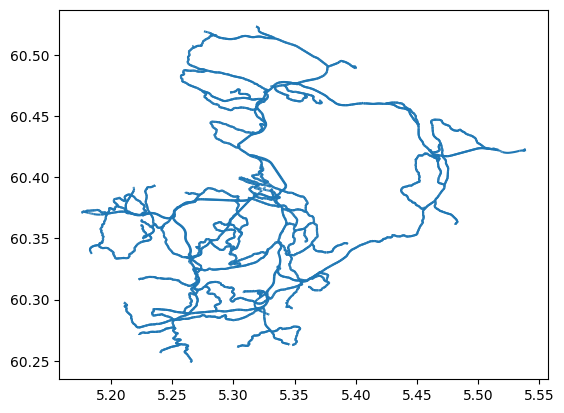

In [12]:
gdf.where(gdf["api_call_time"]==first_morning_date).dropna(how="all").plot()

#### Animated

In [201]:
first_date = first_morning_date
last_date = datetime.strptime(f"2023-04-{day[:2]}T09:30:00.000+02:00", "%Y-%m-%dT%H:%M:%S.%f%z")

In [200]:
gdf_sample = gdf.where(gdf["api_call_time"]==first_date).dropna(how="all")

In [194]:
lats = []
lons = []
lens = []

for feature in gdf_sample['geometry.multi_line']:
    #print(date)
    
    linestrings = feature.geoms
    lens.append(0)
    
    for linestring in linestrings:
        x, y = linestring.xy
        lats = np.append(lats, list(x))
        lons = np.append(lons, list(y))
        lens[-1] += len(y)

    lats = np.append(lats, None)
    lons = np.append(lons, None)

In [203]:
def get_color(jam):
    if jam is None:
        return None
    
    if 0 <= jam <= 3:
        return "green"
    elif 3 < jam <= 7:
        return "orange"
    elif 7 <= jam <= 10:
        return "red"

In [209]:
jams = []
dates = []
cmap = []

for i, date, jam in zip(range(len(gdf)), gdf['api_call_time'], gdf['currentFlow.jamFactor']):
    #print(date)
    
    col = get_color(jam)
    
    cmap = np.append(cmap, [col]*lens[i%len(lens)]+[None])
    jams = np.append(jams, [jam]*lens[i%len(lens)]+[None])
    dates = np.append(dates, [date]*lens[i%len(lens)]+[None])

In [207]:
df1 = pd.DataFrame([lats, lons]).T
df1.columns = ['lats', 'lons']

In [210]:
df2 = pd.DataFrame([jams, dates, cmap]).T
df2.columns = ['jams', 'dates', 'cmap']

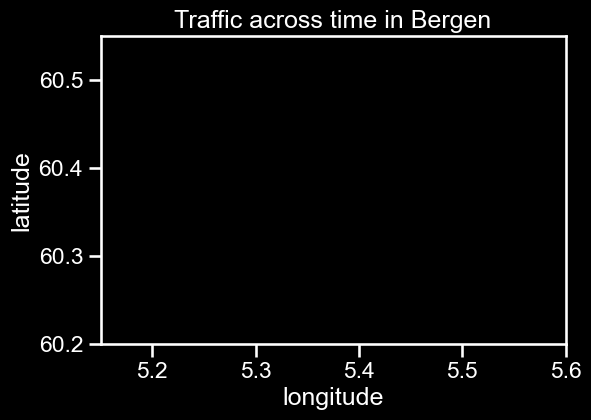

In [309]:
# Create figure and add axes
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
fig = plt.figure(figsize=(6, 4))

#axes1
ax1 = fig.add_subplot(111)
# ax1.set_position([0.1,0.1,0.8,0.8])
ax1.set_xlim(5.15, 5.6)
ax1.set_ylim(60.2, 60.55)
ax1.set_title('Traffic across time in Bergen')
ax1.set_xlabel('longitude')
ax1.set_ylabel('latitude')
t = ax1.text(5.4,60.25,'', fontdict={'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 13,
        })

In [310]:
def animate(i):
    date = df2.dates.dropna().unique()[i]
    
    df = df1.join(df2.where(df2.dates==date)[len(df1)*i:len(df1)*(i+1)].reset_index(drop=True))

    ax1.plot('lats', 'lons', data=df.where((df.cmap=="green") & (df.dates==date)), c="green")
    ax1.plot('lats', 'lons', data=df.where((df.cmap=="orange") & (df.dates==date)), c="orange")
    ax1.plot('lats', 'lons', data=df.where((df.cmap=="red") & (df.dates==date)), c="red")
    t.set_text(str(pd.Timestamp.tz_convert(date, pytz.timezone("Europe/Oslo")))[:16])

In [311]:
ani = FuncAnimation(fig=fig, func=animate, frames=list(range(len(df2.dates.dropna().unique()))), interval=1000, repeat_delay=False)
ani.save('AnimatedPlot2004203morning.gif', dpi=200)

MovieWriter ffmpeg unavailable; using Pillow instead.


#### Folium

In [53]:
ps = []
gdf_first_date = gdf.where(gdf["api_call_time"]==first_morning_date).dropna(how="all")

for i in range(len(gdf_first_date)):
    ps_aux = []
    for p in gdf_first_date['geometry.multi_line'].iloc[i].geoms:
        ps_aux.append([p.coords.xy[1][0], p.coords.xy[0][0]])

    ps.append(ps_aux)

In [54]:
map_ = folium.Map(location=[60.397076, 5.324383], tiles="OpenStreetMap", zoom_start=10)
for point in range(len(ps)+1):
    folium.PolyLine(ps[point-1], color='blue', weight=1).add_to(map_)

In [55]:
map_